# Proyecto Libre Algorítmica Numérica

## Práctica 3, Iván Toribio y Adriana González

--- 

## OBJETIVO:
#### El objetivo principal de este proyecto es crear un generador de música emocional basado en inteligencia artificial. Está diseñado con la intención de representar emociones humanas a través de composiciones musicales. 

#### Para ello se usarán un conjunto datos etiquetados según los ejes de valencia y activación (valence-arousal) para mapear emociones específicas, y genera melodías que capturan la esencia emocional deseada. La aplicaciones de esto se dejan como estudio independiente. Algunos posibles ejemplos serían: influencias terapéuticas, enriquecer la narrativa audiovisual, etc.

---

Vamos a definir más emociones **científicamente** basándonos en el modelo de **circunflejo emocional** (Russell, 1980), que mapea emociones en un plano bidimensional con los ejes de **valence** y **arousal**.

---

#### **Rangos de Valores**
- **Valence** (positividad):
  - \(-1\): Muy negativo.
  - \(0\): Neutral.
  - \(+1\): Muy positivo.
- **Arousal** (activación):
  - \(-1\): Muy calmado.
  - \(0\): Neutral.
  - \(+1\): Muy activo.

#### **Distribución de Emociones en el Espacio**
Basándonos en combinaciones de valence y arousal, podemos asignar emociones más detalladas:

| **Valence**     | **Arousal**     | **Emoción**           |
|------------------|-----------------|-----------------------|
| Muy positivo \(>0.7\) | Muy activo \(>0.7\) | **euforia**           |
| Muy positivo \(>0.7\) | Neutral \((0.3\leq arousal \leq 0.7)\) | **happiness**         |
| Muy positivo \(>0.7\) | Muy calmado \(<0.3\) | **relax**        |
| Neutral \((-0.3\leq valence \leq 0.3)\) | Muy activo \(>0.7\) | **tension**           |
| Neutral \((-0.3\leq valence \leq 0.3)\) | Muy calmado \(<0.3\) | **calm**             |
| Muy negativo \(<-0.7\) | Muy activo \(>0.7\) | **anger**             |
| Muy negativo \(<-0.7\) | Neutral \((0.3\leq arousal \leq 0.7)\) | **melancholy**        |
| Muy negativo \(<-0.7\) | Muy calmado \(<0.3\) | **sorrow** |

---


In [3]:
import pandas as pd
pd.options.display.max_columns = None

In [ ]:
import pandas as pd

# Cargar los CSV
valence_df = pd.read_csv("data/valence_arousal/valence.csv")
arousal_df = pd.read_csv("data/valence_arousal/arousal.csv")

# Verificar que ambos DataFrames tienen la misma estructura
print(valence_df.head())
print(arousal_df.head())

# Combinar ambos DataFrames por 'song_id'
combined_df = pd.merge(valence_df, arousal_df, on="song_id", suffixes=('_valence', '_arousal'))

# Mostrar un resumen del DataFrame combinado
print(combined_df.head())


In [7]:
valence_df = pd.read_csv("data/valence_arousal/valence.csv")
arousal_df = pd.read_csv("data/valence_arousal/arousal.csv")

In [10]:
arousal_df

song_id  sample_15000ms  sample_15500ms  sample_16000ms  sample_16500ms  \
0           2       -0.109386       -0.114942   -1.164126e-01       -0.118613   
1           3       -0.110846       -0.123973   -1.311026e-01       -0.135956   
2           4        0.222327        0.179446    1.783881e-01        0.184056   
3           5       -0.255613       -0.251579   -2.519577e-01       -0.251124   
4           7        0.464234        0.460789    4.609907e-01        0.461046   
...       ...             ...             ...             ...             ...   
1797     2054       -0.190000       -0.182000   -1.800000e-01       -0.158000   
1798     2055       -0.070000       -0.086000   -1.100000e-01       -0.072000   
1799     2056       -0.044000       -0.044000   -4.400000e-02       -0.044000   
1800     2057        0.413333        0.413333    4.116667e-01        0.410000   
1801     2058        0.008000        0.002000   -2.775558e-18        0.006000   

      sample_17000ms  sample_17500ms  sample_18000ms  sample_18500ms  \
0      -1.264569e-01       -0.133199       -0.136855       -0.144713   
1      -1.407755e-01       -0.144664       -0.163118       -0.165218   
2       1.760421e-01        0.178720        0.176345        0.175793   
3      -2.507627e-01       -0.251957       -0.251957       -0.251957   
4       4.572397e-01        0.465702        0.471809        0.469918   
...              ...             ...             ...             ...   
1797   -1.560000e-01       -0.150000       -0.152000       -0.150000   
1798   -6.200000e-02       -0.062000       -0.076000       -0.062000   
1799   -4.200000e-02       -0.046000       -0.050000       -0.052000   
1800    4.066667e-01        0.410000        0.401667        0.371667   
1801   -5.551115e-18        0.002000        0.002000        0.002000   

      sample_19000ms  sample_19500ms  sample_20000ms  sample_20500ms  \
0          -0.138985   -1.376024e-01       -0.138575       -0.140522   
1          -0.158858   -1.567828e-01       -0.160081       -0.169374   
2           0.176154    1.766041e-01        0.180138        0.176360   
3          -0.251957   -2.519567e-01       -0.250848       -0.247444   
4           0.473377    4.700510e-01        0.464498        0.471905   
...              ...             ...             ...             ...   
1797       -0.150000   -1.460000e-01       -0.152000       -0.154000   
1798       -0.042000   -4.600000e-02       -0.018000       -0.024000   
1799       -0.052000   -5.400000e-02       -0.054000       -0.056000   
1800        0.340000    3.283333e-01        0.328333        0.338333   
1801        0.006000   -5.551115e-18       -0.030000       -0.070000   

      sample_21000ms  sample_21500ms  sample_22000ms  sample_22500ms  \
0          -0.144348       -0.150365       -0.152446   -1.534950e-01   
1          -0.165857       -0.164108       -0.161764   -1.624463e-01   
2           0.168876        0.171422        0.169539    1.684931e-01   
3          -0.242066       -0.241087       -0.241087   -2.410867e-01   
4           0.477970        0.449070        0.403073    3.940040e-01   
...              ...             ...             ...             ...   
1797       -0.158000       -0.164000       -0.166000   -1.760000e-01   
1798       -0.014000       -0.012000       -0.008000   -4.163336e-18   
1799       -0.060000       -0.060000       -0.060000   -6.000000e-02   
1800        0.318333        0.301667        0.291667    2.783333e-01   
1801       -0.086000        0.006000        0.068000    8.400000e-02   

      sample_23000ms  sample_23500ms  sample_24000ms  sample_24500ms  \
0          -0.155344       -0.153442       -0.147347       -0.146429   
1          -0.170079       -0.168090       -0.164870       -0.161530   
2           0.169783        0.173216        0.164226        0.165260   
3          -0.238962       -0.239783       -0.237609       -0.237609   
4           0.398359        0.393433        0.392229        0.386149   
...   

In [11]:
valence_df

song_id  sample_15000ms  sample_15500ms  sample_16000ms  sample_16500ms  \
0           2       -0.073341       -0.074661       -0.074077       -0.078154   
1           3       -0.189702       -0.187765       -0.183740       -0.188761   
2           4        0.154286        0.148063        0.146956        0.151180   
3           5        0.149053        0.148260        0.147369        0.146956   
4           7        0.342816        0.345193        0.332023        0.328887   
...       ...             ...             ...             ...             ...   
1797     2054        0.088000        0.088000        0.086000        0.080000   
1798     2055        0.128000        0.098000        0.080000        0.080000   
1799     2056        0.198000        0.182000        0.164000        0.156000   
1800     2057       -0.071667       -0.061667       -0.076667       -0.078333   
1801     2058       -0.152000       -0.154000       -0.160000       -0.162000   

      sample_17000ms  sample_17500ms  sample_18000ms  sample_18500ms  \
0          -0.081588       -0.080873       -0.083611       -0.082145   
1          -0.193704       -0.190834       -0.189041       -0.197554   
2           0.135942        0.076832        0.084487        0.088513   
3           0.147857        0.146927        0.145651        0.145795   
4           0.327603        0.329011        0.327883        0.334822   
...              ...             ...             ...             ...   
1797        0.070000        0.068000        0.076000        0.078000   
1798        0.088000        0.088000        0.086000        0.078000   
1799        0.148000        0.142000        0.144000        0.146000   
1800       -0.081667       -0.046667       -0.046667       -0.068333   
1801       -0.158000       -0.162000       -0.166000       -0.164000   

      sample_19000ms  sample_19500ms  sample_20000ms  sample_20500ms  \
0          -0.081632       -0.083874       -0.085105       -0.087188   
1          -0.202871       -0.209757       -0.212038       -0.206937   
2           0.090944        0.085544        0.100404        0.179465   
3           0.146420        0.152565        0.153315        0.147846   
4           0.328447        0.344121        0.337617        0.339964   
...              ...             ...             ...             ...   
1797        0.074000        0.074000        0.074000        0.070000   
1798        0.068000        0.066000        0.066000        0.052000   
1799        0.160000        0.168000        0.178000        0.174000   
1800       -0.113333       -0.133333       -0.145000       -0.151667   
1801       -0.172000       -0.160000       -0.138000       -0.126000   

      sample_21000ms  sample_21500ms  sample_22000ms  sample_22500ms  \
0          -0.088078       -0.088742       -0.089806       -0.091019   
1          -0.206569       -0.215245       -0.225404       -0.232054   
2           0.183864        0.162215        0.136317        0.092502   
3           0.138537        0.137735        0.137825        0.156450   
4           0.329331        0.334279        0.335485        0.342974   
...              ...             ...             ...             ...   
1797        0.090000        0.090000        0.090000        0.090000   
1798        0.048000        0.042000        0.046000        0.054000   
1799        0.168000        0.160000        0.148000        0.162000   
1800       -0.158333       -0.161667       -0.165000       -0.165000   
1801       -0.120000       -0.140000       -0.180000       -0.194000   

      sample_23000ms  sample_23500ms  sample_24000ms  sample_24500ms  \
0          -0.092365       -0.093924       -0.095489       -0.097135   
1          -0.231102       -0.228758       -0.235275       -0.242087   
2           0.081918        0.096085        0.089629        0.090773   
3           0.204919        0.208784        0.239129        0.203294   
4           0.345424        0.341366        0.334168        0.347387   
...   

In [ ]:
# cmbinar ambos df por 'song_id'
combined_df = pd.merge(valence_df, arousal_df, on="song_id", suffixes=('_valence', '_arousal'))

combined_df

song_id  sample_15000ms_valence  sample_15500ms_valence  \
0           2               -0.073341               -0.074661   
1           3               -0.189702               -0.187765   
2           4                0.154286                0.148063   
3           5                0.149053                0.148260   
4           7                0.342816                0.345193   
...       ...                     ...                     ...   
1797     2054                0.088000                0.088000   
1798     2055                0.128000                0.098000   
1799     2056                0.198000                0.182000   
1800     2057               -0.071667               -0.061667   
1801     2058               -0.152000               -0.154000   

      sample_16000ms_valence  sample_16500ms_valence  sample_17000ms_valence  \
0                  -0.074077               -0.078154               -0.081588   
1                  -0.183740               -0.188761               -0.193704   
2                   0.146956                0.151180                0.135942   
3                   0.147369                0.146956                0.147857   
4                   0.332023                0.328887                0.327603   
...                      ...                     ...                     ...   
1797                0.086000                0.080000                0.070000   
1798                0.080000                0.080000                0.088000   
1799                0.164000                0.156000                0.148000   
1800               -0.076667               -0.078333               -0.081667   
1801               -0.160000               -0.162000               -0.158000   

      sample_17500ms_valence  sample_18000ms_valence  sample_18500ms_valence  \
0                  -0.080873               -0.083611               -0.082145   
1                  -0.190834               -0.189041               -0.197554   
2                   0.076832                0.084487                0.088513   
3                   0.146927                0.145651                0.145795   
4                   0.329011                0.327883                0.334822   
...                      ...                     ...                     ...   
1797                0.068000                0.076000                0.078000   
1798                0.088000                0.086000                0.078000   
1799                0.142000                0.144000                0.146000   
1800               -0.046667               -0.046667               -0.068333   
1801               -0.162000               -0.166000               -0.164000   

      sample_19000ms_valence  sample_19500ms_valence  sample_20000ms_valence  \
0                  -0.081632               -0.083874               -0.085105   
1                  -0.202871               -0.209757               -0.212038   
2                   0.090944                0.085544                0.100404   
3                   0.146420                0.152565                0.153315   
4                   0.328447                0.344121                0.337617   
...                      ...                     ...                     ...   
1797                0.074000                0.074000                0.074000   
1798                0.068000                0.066000                0.066000   
1799                0.160000                0.168000                0.178000   
1800               -0.113333               -0.133333               -0.145000   
1801               -0.172000               -0.160000               -0.138000   

      sample_20500ms_valence  sample_21000ms_valence  sample_21500ms_valence  \
0                  -0.087188               -0.088078               -0.088742   
1                  -0.206937               -0.206569               -0.215245   
2                   0.179465                0.183864                0.162215   
3                   0.

Para poder usar el modelo de Russel vamos a usar los df individualmente y agruparlos por su song_id y el momento de la canción para los cuales tenemos los valores de valence y arousal

In [14]:
valence_long = valence_df.melt(id_vars="song_id", var_name="timestamp", value_name="valence")
arousal_long = arousal_df.melt(id_vars="song_id", var_name="timestamp", value_name="arousal")

long_df = pd.merge(valence_long, arousal_long, on=["song_id", "timestamp"])

long_df

,song_id,timestamp,valence,arousal
0,2,sample_15000ms,-0.073341,-0.109386
1,3,sample_15000ms,-0.189702,-0.110846
2,4,sample_15000ms,0.154286,0.222327
3,5,sample_15000ms,0.149053,-0.255613
4,7,sample_15000ms,0.342816,0.464234
...,...,...,...,...
2203841,2054,sample_626000ms,NaN,NaN
2203842,2055,sample_626000ms,NaN,NaN
2203843,2056,sample_626000ms,NaN,NaN
2203844,2057,sample_626000ms,NaN,NaN


In [15]:
def map_emotion(valence, arousal):
    if valence > 0.7 and arousal > 0.7:
        return 'euforia'
    elif valence > 0.7 and arousal >= 0.3:
        return 'happiness'
    elif valence > 0.7 and arousal < 0.3:
        return 'relax'
    elif -0.3 <= valence <= 0.3 and arousal > 0.7:
        return 'tension'
    elif -0.3 <= valence <= 0.3 and arousal < 0.3:
        return 'calm'
    elif valence < -0.7 and arousal > 0.7:
        return 'anger'
    elif valence < -0.7 and arousal >= 0.3:
        return 'melancholy'
    elif valence < -0.7 and arousal < 0.3:
        return 'sorrow'
    else:
        return 'bland'

In [16]:
long_df['Emoción'] = long_df.apply(lambda row: map_emotion(row['valence'], row['arousal']), axis=1)

In [24]:
random_rows = long_df.sample(n=20)
random_rows

,song_id,timestamp,valence,arousal,Emoción
1270848,544,sample_367500ms,NaN,NaN,bland
579705,1520,sample_175500ms,NaN,NaN,bland
1235559,1446,sample_357500ms,NaN,NaN,bland
416189,1986,sample_130000ms,NaN,NaN,bland
1336185,1160,sample_385500ms,NaN,NaN,bland
2030056,1261,sample_578000ms,NaN,NaN,bland
293218,1551,sample_96000ms,NaN,NaN,bland
2106059,1580,sample_599000ms,NaN,NaN,bland
1020196,314,sample_298000ms,NaN,NaN,bland
1556029,1160,sample_446500ms,NaN,NaN,bland


nos damos cuenta que hay muchas filas que estan llenas de NaN, por lo que vamos a proceder a filtrarlas

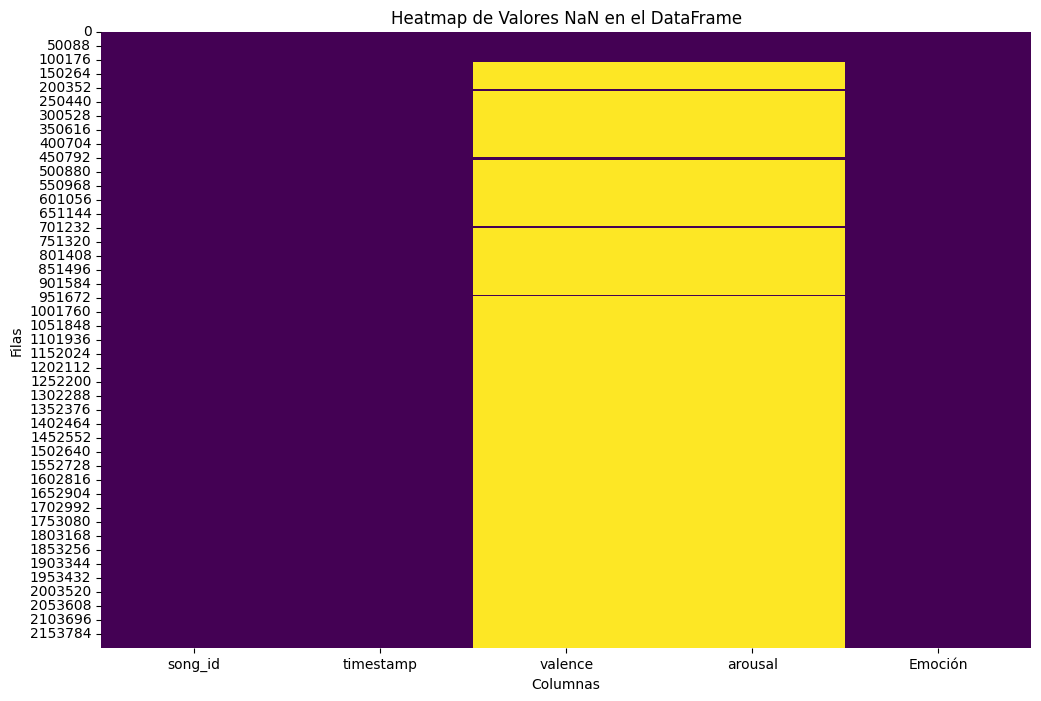

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# Subconjunto de columnas para visualizar el heatmap
nan_heatmap_df = long_df.isnull()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(nan_heatmap_df, cbar=False, cmap="viridis")
plt.title("Heatmap de Valores NaN en el DataFrame")
plt.xlabel("Columnas")
plt.ylabel("Filas")
plt.show()


In [27]:
null_counts_by_row = long_df.isnull().sum(axis=1)
null_counts_by_row

0          0
1          0
2          0
3          0
4          0
          ..
2203841    2
2203842    2
2203843    2
2203844    2
2203845    2
Length: 2203846, dtype: int64

In [29]:
long_df_cleaned = long_df.dropna(subset=['valence', 'arousal'], how='any')
long_df_cleaned

,song_id,timestamp,valence,arousal,Emoción
0,2,sample_15000ms,-0.073341,-0.109386,calm
1,3,sample_15000ms,-0.189702,-0.110846,calm
2,4,sample_15000ms,0.154286,0.222327,calm
3,5,sample_15000ms,0.149053,-0.255613,calm
4,7,sample_15000ms,0.342816,0.464234,bland
...,...,...,...,...,...
2196590,2011,sample_624000ms,-0.150000,-0.236000,calm
2198392,2011,sample_624500ms,-0.152000,-0.332000,calm
2200194,2011,sample_625000ms,-0.150000,-0.370000,calm
2201996,2011,sample_625500ms,-0.136000,-0.392000,calm


In [43]:
random_rows = long_df_cleaned.sample(n=20)
random_rows

,song_id,timestamp,valence,arousal,Emoción
101986,1331,sample_43000ms,0.244000,0.168000,calm
105338,1079,sample_44000ms,0.516000,0.504000,bland
76601,1174,sample_36000ms,-0.234000,-0.020000,calm
53314,1313,sample_29500ms,0.058000,-0.014000,calm
36972,1189,sample_25000ms,0.089000,-0.044000,calm
67543,1126,sample_33500ms,-0.095000,-0.107000,calm
5588,215,sample_16500ms,-0.380661,-0.245230,bland
84850,188,sample_38500ms,-0.209758,-0.185344,calm
9392,462,sample_17500ms,0.025834,0.240187,calm
17298,1337,sample_19500ms,0.061000,0.618000,bland


In [51]:
filtered_rows = long_df[~long_df['Emoción'].isin(['bland', 'calm'])]
filtered_rows

,song_id,timestamp,valence,arousal,Emoción
15218,1059,sample_19000ms,-0.169,0.702,tension
22621,1254,sample_21000ms,0.117,0.701,tension
26225,1254,sample_22000ms,0.114,0.703,tension
29634,1059,sample_23000ms,-0.140,0.701,tension
33433,1254,sample_24000ms,0.117,0.703,tension
...,...,...,...,...,...
1360465,2014,sample_392000ms,-0.724,0.656,melancholy
1362267,2014,sample_392500ms,-0.726,0.654,melancholy
1369475,2014,sample_394500ms,-0.704,0.660,melancholy
1371277,2014,sample_395000ms,-0.708,0.658,melancholy


comprobamos que no detecta casi ninguna empcion distinta de bland o calm. Debe ser porque los datos no se ajustan a los rangos de la funcion.

In [45]:
# Calcular máximos y mínimos
valence_max = long_df['valence'].max()
valence_min = long_df['valence'].min()
arousal_max = long_df['arousal'].max()
arousal_min = long_df['arousal'].min()

# Mostrar resultados
print(f"Valence - Max: {valence_max}, Min: {valence_min}")
print(f"Arousal - Max: {arousal_max}, Min: {arousal_min}")


Valence - Max: 0.716, Min: -0.832
Arousal - Max: 0.898, Min: -0.772351


In [46]:
def map_emotion(valence, arousal):
    if valence > 0.6 and arousal > 0.6:
        return 'euforia'
    elif valence > 0.6 and arousal >= 0.2:
        return 'happiness'
    elif valence > 0.6 and arousal < 0.2:
        return 'relax'
    elif -0.2 <= valence <= 0.2 and arousal > 0.6:
        return 'tension'
    elif -0.2 <= valence <= 0.2 and arousal < 0.2:
        return 'calm'
    elif valence < -0.6 and arousal > 0.6:
        return 'anger'
    elif valence < -0.6 and arousal >= 0.2:
        return 'melancholy'
    elif valence < -0.6 and arousal < 0.2:
        return 'sorrow'
    else:
        return 'bland'


In [48]:
df = long_df.dropna(subset=['valence', 'arousal'], how='any').copy()

In [49]:
# Aplicar la función ajustada
df['Emoción'] = df.apply(lambda row: map_emotion(row['valence'], row['arousal']), axis=1)


In [50]:
# Verificar los resultados
df[['valence', 'arousal', 'Emoción']]

,valence,arousal,Emoción
0,-0.073341,-0.109386,calm
1,-0.189702,-0.110846,calm
2,0.154286,0.222327,bland
3,0.149053,-0.255613,calm
4,0.342816,0.464234,bland
...,...,...,...
2196590,-0.150000,-0.236000,calm
2198392,-0.152000,-0.332000,calm
2200194,-0.150000,-0.370000,calm
2201996,-0.136000,-0.392000,calm


In [53]:
filtered_rows_df = df[~df['Emoción'].isin(['bland', 'calm'])]
filtered_rows_df

,song_id,timestamp,valence,arousal,Emoción
797,1054,sample_15000ms,-0.200,0.623,tension
799,1056,sample_15000ms,0.075,0.647,tension
802,1059,sample_15000ms,-0.122,0.678,tension
997,1254,sample_15000ms,0.091,0.672,tension
1463,1720,sample_15000ms,0.614,0.515,happiness
...,...,...,...,...,...
1382089,2014,sample_398000ms,-0.698,0.640,anger
1383891,2014,sample_398500ms,-0.698,0.640,anger
1385693,2014,sample_399000ms,-0.686,0.640,anger
1387495,2014,sample_399500ms,-0.666,0.610,anger
